In [1]:
import minke
from minke import mdctools
from minke import sources
from minke import distribution

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mdcset = mdctools.MDCSet(['L1', 'H1'])

In [5]:
times = distribution.even_time(start = 1126620016, stop = 1136995216, rate = 630720, jitter = 20)
hrss_values = distribution.log_uniform(5e-23, 1e-20, len(times))

In [7]:
wnb = sources.WhiteNoiseBurst(duration=0.1, bandwidth=10, frequency=1000, 
                                  hrss=1e-21, time=1126620016, seed=3)

In [15]:
type(wnb._row())

glue.ligolw.lsctables.SimBurst

In [11]:
import lalsimulation as ls
import lalburst

In [18]:
x = wnb._row()

In [22]:
x.time_geocent.gpsSeconds

1126620016

In [17]:
a, b = lalburst.GenerateSimBurst(wnb._row(), 1.0/16384)

TypeError: in method 'GenerateSimBurst', argument 3 of type 'SimBurst const *'

In [ ]:
mdcset = mdctools.MDCSet(['L1', 'H1'])
for hrss, time in zip(hrss_values, times):
    # The HF WNB
    # Note that the frequency is the low frequency, to keep consistency with 
    # the way things are specified in the burst group spec. 
    # Minke converts this into the central frequency
    # under the hood.
    wnb = sources.WhiteNoiseBurst(duration=0.1, bandwidth=10, frequency=1000, 
                                  hrss=hrss, time=time, seed=3)
    mdcset + wnb
mdcset.save_xml('wnb1000b10tau0d1.xml.gz')

In [6]:
import numpy as np

In [7]:
for hrss, time in zip(hrss_values, times):
    sn = sources.Scheidegger2010(incl=0., phi=0., time=time, filepath="R1E1CA_L.txt")
    mdcset + sn

In [8]:
for hrss, time in zip(hrss_values, times):
    dm = sources.Dimmelmeier08(time=time, filepath="signal_s15a2o05_ls.dat")
    mdcset + dm

In [9]:
len(dm.hp.data.data)

AttributeError: 'Dimmelmeier08' object has no attribute 'hp'

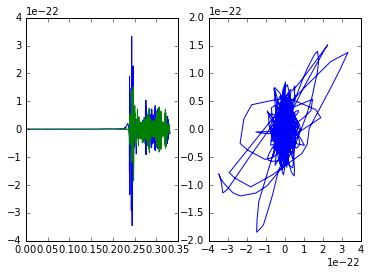

In [13]:
sn.plot()

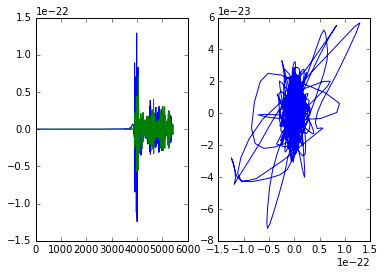

In [11]:
plus = np.loadtxt("R1E1CA_L_theta0.000_phi0.000-plus.txt")
cross = np.loadtxt("R1E1CA_L_theta0.000_phi0.000-cross.txt")
f, ax = plt.subplots(1,2)
ax[0].plot(plus)
ax[0].plot(cross)
ax[1].plot(plus, -cross)

In [ ]:
for hrss, time in zip(hrss_values, times):
    sg = sources.SineGaussian(q=2, frequency=200, hrss=hrss, 
                         polarisation='circular', time=time, seed=3)
    mdcset + sg

In [ ]:
sg.row.psi

In [ ]:
for hrss, time in zip(hrss_values, times):
    ga = sources.Gaussian(duration = 0.001,  hrss=hrss, time=time, seed=3)
    mdcset + ga

In [12]:
mdcset = mdctools.MDCSet(['L1', 'H1'])
for hrss, time in zip(hrss_values, times):
    wnb = sources.WhiteNoiseBurst(duration=0.1, bandwidth=10, frequency=1000, hrss=hrss, 
                         polarisation='elliptical', time=time, seed=3)
    mdcset + wnb

In [ ]:
sg.params

In [ ]:
wnb.plot()

In [ ]:
ga.plot()

In [ ]:
sg.plot()

In [ ]:
mdcset + sg

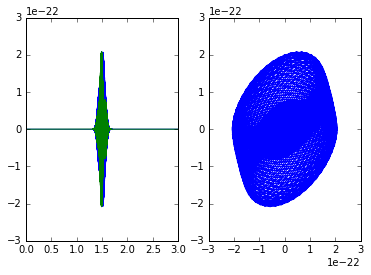

In [18]:
mdcset.waveforms[5000].plot()

In [ ]:
mdcset.save_xml('test.xml.gz')

In [ ]:
mdcset2 = mdctools.MDCSet(['L1', 'H1'])
mdcset2.load_xml('ga_d0100_rescaled.xml.gz', full=False)

In [ ]:
sn_mdc = mdctools.MDCSet(['L1', 'H1'])

In [ ]:
sn_mdc.load_xml('DM_s15_a2_09.xml.gz', full=False)

In [ ]:
sn_mdc.waveforms[0].numrel_data

In [ ]:

for a in lsctables.SimBurstTable.validcolumns.keys():
    print a